In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#df=pd.read_csv('Data1.csv')
fd=pd.read_csv('Data1.csv')

In [3]:
fd.head()

,DATE_KEY,OFFRNG_ID,GEO_ID,NO_OF_OPRTNTY_CREATD,NO_OF_WINS,DATE
0,42901,194,15,1,1,2017-06-15
1,42901,194,46,1,0,2017-06-15
2,42901,194,224,0,1,2017-06-15
3,42901,194,46,1,0,2017-06-15
4,42901,194,224,0,1,2017-06-15


In [27]:
fd=fd[fd['OFFRNG_ID']==178]


In [28]:
fd=fd.drop('DATE_KEY',axis=1)
fd=fd.drop('OFFRNG_ID',axis=1)
fd=fd.drop('GEO_ID',axis=1)

In [29]:
fd.head()

,NO_OF_OPRTNTY_CREATD,NO_OF_WINS,DATE
138,1,0,2017-06-20
269,2,0,2017-06-20
410,0,1,2017-04-27
632,1,0,2017-04-25
714,0,1,2017-04-27


In [30]:
fd['DATE'] = pd.to_datetime(fd['DATE'], errors='coerce')


In [31]:
per = fd.DATE.dt.to_period("M")  # new way to get the same

data = fd.groupby(per)

data=data.sum()

In [32]:
data



,NO_OF_OPRTNTY_CREATD,NO_OF_WINS
DATE,,
2016-12,0,12
2017-01,22,19
2017-02,66,12
2017-03,57,5
2017-04,7,4
2017-05,84,21
2017-06,82,24
2017-07,67,24
2017-08,55,22


In [33]:
y=data["NO_OF_OPRTNTY_CREATD"].iloc[-2:]
y

DATE
2019-01    23
2019-02    24
Freq: M, Name: NO_OF_OPRTNTY_CREATD, dtype: int64

In [34]:
data = data.ix[1:]
data = data.ix[:-2]

In [35]:
data=data.drop('NO_OF_WINS',axis=1)

In [36]:
data.index

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', name='DATE', freq='M')

In [37]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [38]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:269.4727720247196
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:121.39450185312215
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:131.0360535136023
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:254.57821296405206
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:113.2931714056009
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:133.03548176803108
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:250.13009587917676
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:117.38691525842458
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:126.99107413034805
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:227.49090758613463
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:104.22841685030227
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:122.48638663002266
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:258.94089166913136
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:123.19991440673742
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:123.2144498268284
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:239.70433616425072
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:114.95281051783566
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:123.94503857404

In [40]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6964      0.341     -2.044      0.041      -1.364      -0.029
ma.L1         -0.1696      0.743     -0.228      0.819      -1.625       1.286
sigma2      3102.8603   2528.645      1.227      0.220   -1853.193    8058.913


In [41]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()


In [42]:
pred_ci

,lower NO_OF_OPRTNTY_CREATD,upper NO_OF_OPRTNTY_CREATD
DATE,,
2018-01,-1361.891700,1792.133854
2018-02,-86.316346,254.839935
2018-03,-45.370852,174.827909
2018-04,-117.305244,101.100183
2018-05,-32.360768,185.993757
2018-06,8.806578,227.159639
2018-07,-40.858428,177.494591
2018-08,23.453067,241.806085
2018-09,-54.465775,163.887243


In [43]:
data

,NO_OF_OPRTNTY_CREATD
DATE,
2017-01,22
2017-02,66
2017-03,57
2017-04,7
2017-05,84
2017-06,82
2017-07,67
2017-08,55
2017-09,54


In [44]:
pred.predicted_mean

DATE
2018-01    215.121077
2018-02     84.261795
2018-03     64.728528
2018-04     -8.102530
2018-05     76.816495
2018-06    117.983109
2018-07     68.318082
2018-08    132.629576
2018-09     54.710734
2018-10     59.317018
2018-11     71.113705
2018-12    181.079053
Freq: M, dtype: float64

In [45]:
pred_uc = results.get_forecast(steps=2)
pred_uc.predicted_mean

2019-01    -7.020748
2019-02   -45.665296
Freq: M, dtype: float64

In [46]:
x=pred_uc.predicted_mean
x1=x.astype(int)

### Just for plotting 

In [47]:
prediction = []
for e in x1:
    prediction.append(e)

In [48]:
prediction

[-7, -45]

In [49]:
actual = []
for e in y:
    actual.append(e)
print(actual)

[23, 24]


In [50]:
index = [1,2]

This is the forecasted value for next 2 months
Offering_ID = 197
predicted value [-7, -45]
actual outcome [23, 24]
mean squared error
2830.5
mean absolute error


NameError: name 'forecast_errors' is not defined

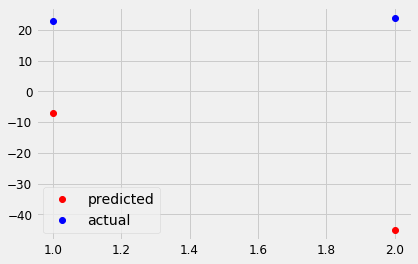

In [51]:
plt.plot(index, prediction,'ro',label='predicted')
plt.plot(index, actual,'bo',label = 'actual')
plt.legend()
print("This is the forecasted value for next 2 months")
print("Offering_ID = 197")
print("predicted value",prediction)
print("actual outcome",actual)

print("mean squared error")
print(np.square(np.subtract(prediction, actual)).mean())

# forecast_errors = [actual[i]-prediction[i] for i in range(len(actual))]
# print('Forecast Errors: %s' % forecast_errors)
import statistics
from statistics import mean
print("mean absolute error")
#statistics.mean(forecast_errors)


In [52]:
# from matplotlib import pyplot 
# pyplot.plot(pred_uc.predicted_mean)
# pyplot.plot(y, color='red')
# pyplot.show()

In [53]:
print("mean squared error")
print(np.square(np.subtract(prediction, actual)).mean())


mean squared error
2830.5


In [54]:
forecast_errors = [actual[i]-prediction[i] for i in range(len(actual))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [30, 69]


In [55]:
import statistics
from statistics import mean
print("mean absolute error")
statistics.mean(forecast_errors)


mean absolute error


49.5

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(actual, prediction)
print('MSE: %3f' % mse)
mse= sqrt(mse)
mse

MSE: 2830.500000


53.2024435529046

In [57]:
def mean_absolute_percentage_error(actual, prediction): 
    actual, prediction = np.array(actual), np.array(prediction)
    return np.mean(np.abs((actual - prediction) / actual)) * 100

In [58]:
error = mean_squared_error(actual, prediction)
error

2830.5